In [1]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("1history.pkl","rb") as f:
    his = pkl.load(f)
his.keys()

dict_keys(['midprice', 'action', 'hands'])

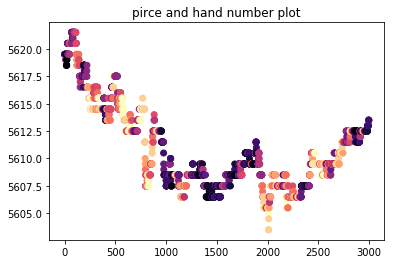

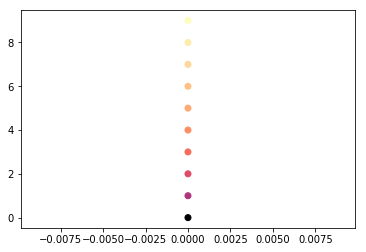

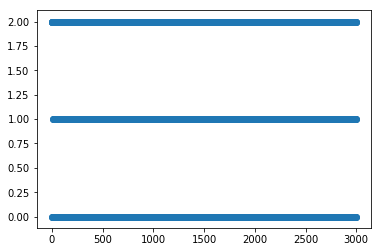

In [95]:
def showHistory(filename):
    with open(filename,"rb") as f:
        his = pkl.load(f)
    midprice, action,hands = his["midprice"],his["action"],his["hands"]
    x = np.arange(len(midprice))#[3200:]
    y = np.array(midprice)#[3200:]
#     g = (np.array(hands) *1000)**(1/4)*10 
    g = np.array(hands)#[3200:]
#     g = g[:30]
#     g[1000:] = g.max()
#     g = g/g.max().astype(int)
#     g = np.sqrt(g)*10
#     xx,yy,gg = [],[],[]
#     for i in range(10):
#         for a,b,c in zip(x,y,g):
#             if(c==i):
#                 xx.append(a)
#                 yy.append(b)
#                 gg.append(c)
    xx,yy,gg = x,y,g
#     print(gg)
#     print(xx)
#     gg = np.array(gg)**(1/3)
    plt.scatter( xx,yy , c =gg ,cmap= "magma",  label=g)
#     plt.scatter(x, y, c = g,cmap= "magma",  label=g)

    plt.title('pirce and hand number plot')
    # plt.legend(loc=2)
    plt.show()
    plt.scatter(np.zeros(10),np.arange(10),c = ((np.arange(10)*1000)**(1/3))*10,cmap="magma")
#     plt.scatter(np.zeros(10),np.arange(10),c = np.ones(10),cmap="magma")

#     plt.scatter(np.zeros(10),np.arange(10),c = np.arange(10),cmap="magma")
    plt.show()
    plt.scatter(x,np.array(action))
    plt.show()
showHistory("1history.pkl")

In [100]:
def behaviorCalulation(filename):
    with open(filename,"rb") as f:
        his = pkl.load(f)
    midprice, bidprice,askprice,action,hands = his["midprice"],his["bidprice"],his["askprice"],his["action"],his["hands"]
    midprice, bidprice,askprice,action,hands = midprice[2700:], bidprice[2700:],askprice[2700:],action[2700:],hands[2700:]
    profit = - hands[0]*askprice[0]
    print("INITHand:",hands[0])
#     profit = 0
    buyprices = []
    sellprices = []
    for i in range(1,len(midprice)):
        handChange = hands[i]-hands[i-1]
        if(handChange==0): # hold
            continue
        if(handChange==1): #buy
            profit -= askprice[i]
            buyprices.append(askprice[i])
        if(handChange==-1):
            profit += bidprice[i]
            sellprices.append(bidprice[i])
    profit += hands[-1]*bidprice[-1]
#     print(len(sellprices),hands[-1])
    for i in range(hands[-1]):
        sellprices.append(bidprice[-1])
#     print(len(sellprices))
    print("PROFIT:",profit)
    print("AveBuyPrice:",sum(buyprices)/len(buyprices))
    print("AveSellPrice:",sum(sellprices)/len(sellprices))
behaviorCalulation("1history.pkl")

INITHand: 9
PROFIT: -62.0
AveBuyPrice: 5612.405063291139
AveSellPrice: 5611.454545454545
